# Importing dataset and libraries

In [ ]:
# -*- coding: utf-8 -*-
import pandas as pd
import os
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras.layers as layers
import tensorflow.keras.models as models
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
import csv
import itertools

# Loading dataset and pre-processing

In [ ]:
#loading the dataset and oversampling
df = pd.read_csv("dataset.csv")
#remove filename column 
df.drop(["filename"], axis=1, inplace=True)
#remove the ID column as it does not provide any information 
df.drop(["ID"], axis=1, inplace=True)
map_dict = {"positive":1, "negative":0}
#mapping the values of the dict 
df['label'] = df['label'].map(map_dict)
#since all the positives were first and negatives last, we shuffling the dataset
shuffle_df = df.reindex(np.random.permutation(df.index))
#labels
y = shuffle_df['label'].to_numpy()
#rest of data
X = (shuffle_df.iloc[:, :-1]).to_numpy()

In [ ]:
shuffle_train_df

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
296,0.472700,0.095182,2010.091946,2129.092226,4173.207349,0.108826,-288.787994,72.939026,30.492199,30.237995,-23.568962,23.620920,-0.081784,-2.392857,-8.426756,0.978445,-4.753188,2.796002,3.326457,0.308255,-0.555330,-0.786596,-5.093400,2.520420,-0.064443,-1.661693,1
333,0.503898,0.040529,2488.790288,2173.042756,5001.664294,0.171856,-354.403656,66.594856,-12.704334,11.248359,-16.324646,-0.638090,-14.567016,3.998090,-9.119742,8.447459,-12.531191,-10.964390,-4.742281,-4.613699,-12.608084,0.152711,-0.198465,-0.916797,-4.713051,-2.454949,1
201,0.565149,0.012435,2012.213981,1942.603935,4119.893606,0.130568,-476.308929,113.009598,-14.827119,-6.716372,-23.794834,6.768663,-14.223404,0.724188,-2.462110,2.049082,-3.748639,-2.445319,-3.568883,-6.561740,-3.189724,-4.640841,-3.988842,-4.635415,-4.023716,-0.170226,1
119,0.444164,0.059750,1783.170788,1743.991786,3573.610651,0.097764,-324.657837,92.372215,-11.116370,26.578297,-5.264464,6.901002,-2.818893,-4.515477,-1.048428,2.080185,-2.085477,3.602315,3.955061,1.691638,0.477819,0.749449,-0.286775,-1.473278,-0.749033,-1.902988,1
248,0.469624,0.051484,2267.743043,2102.686498,4622.336278,0.133124,-379.354919,62.811214,5.396968,19.695469,-15.851946,8.159806,-5.403312,-8.021695,-11.393843,-3.939865,-4.178975,-1.744699,-3.394624,-3.862376,-4.170105,-3.039779,-3.490988,-6.490369,-3.699343,-4.219374,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,0.300507,0.026961,2081.322963,1805.239098,4152.765158,0.123532,-313.139862,105.781761,-45.703331,29.241951,-40.297070,-1.960042,-19.985943,-3.069674,-13.291458,-12.606362,4.615507,-13.612047,-6.775082,-8.679439,-11.037719,-4.675139,0.838220,3.979916,8.202349,7.070324,1
213,0.570104,0.048989,2695.513053,2347.346876,5597.183462,0.205053,-407.972443,72.381691,-1.411621,21.179087,-10.337657,11.335569,-14.199793,-1.094921,-8.275647,1.549436,-8.409617,-6.989861,-0.538260,0.431457,-2.892706,-2.964024,-3.964855,-2.138947,-5.958745,-2.862919,1
393,0.596101,0.092228,1528.434396,1881.914836,3341.454185,0.060073,-364.379517,94.132149,15.863348,18.728989,6.106920,13.686718,4.294475,10.848969,-4.725742,4.018132,-2.794808,1.287766,-4.249248,-0.245838,-2.806886,0.323741,-0.242372,-4.903433,0.300355,-0.771246,1
364,0.399529,0.076002,2285.283918,1979.255847,4574.474960,0.167480,-314.625427,70.209106,-18.951010,-6.901423,-33.555347,7.411767,-18.248398,-15.578608,-4.495539,3.703122,-8.226948,-10.551551,-7.516805,-10.324085,-8.307159,-4.881228,-7.199507,-3.842783,1.741336,5.937228,1


## Splitting data into train set, test set and validation set

In [ ]:
#instantiate the Label Encoder 
label_encoder = LabelEncoder()
#fit and transform the encoder 
y = label_encoder.fit_transform(y)

#instantiate scaler 
scaler = StandardScaler()
#fit transform scaler 
X = scaler.fit_transform(X)

#separating the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

 # Classification model

In [ ]:
def evaluate_model(history,X_test,y_test,model):
    #################### Evaluation  #########################
    scores = model.evaluate((X_test),y_test, verbose=0)
    print("Précision: %.2f%%" % (scores[1]*100))
    ##########################################################
    
    print(history)
    fig1, ax_acc = plt.subplots()
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Model accuracy')
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()
    
    fig2, ax_loss = plt.subplots()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Model Loss')
    plt.legend(['Training', 'Validation'], loc='upper right')
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.show()

## Model 1 : ANN

Epoch 1/30
8/8 [==============================] - 1s 26ms/step - loss: 2.0579 - accuracy: 0.4332 - val_loss: 1.4388 - val_accuracy: 0.9043
Epoch 2/30
8/8 [==============================] - 0s 7ms/step - loss: 0.9429 - accuracy: 0.9251 - val_loss: 0.6225 - val_accuracy: 0.9043
Epoch 3/30
8/8 [==============================] - 0s 6ms/step - loss: 0.4398 - accuracy: 0.9251 - val_loss: 0.4751 - val_accuracy: 0.9043
Epoch 4/30
8/8 [==============================] - 0s 5ms/step - loss: 0.3289 - accuracy: 0.9251 - val_loss: 0.3221 - val_accuracy: 0.9043
Epoch 5/30
8/8 [==============================] - 0s 6ms/step - loss: 0.2188 - accuracy: 0.9251 - val_loss: 0.2260 - val_accuracy: 0.9043
Epoch 6/30
8/8 [==============================] - 0s 5ms/step - loss: 0.1745 - accuracy: 0.9358 - val_loss: 0.2037 - val_accuracy: 0.9255
Epoch 7/30
8/8 [==============================] - 0s 6ms/step - loss: 0.1485 - accuracy: 0.9385 - val_loss: 0.1791 - val_accuracy: 0.9043
Epoch 8/30
8/8 [=================

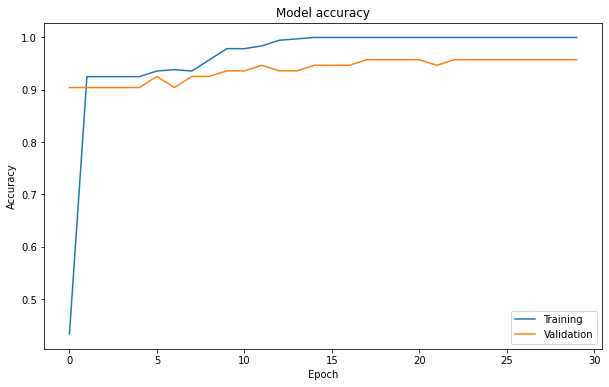

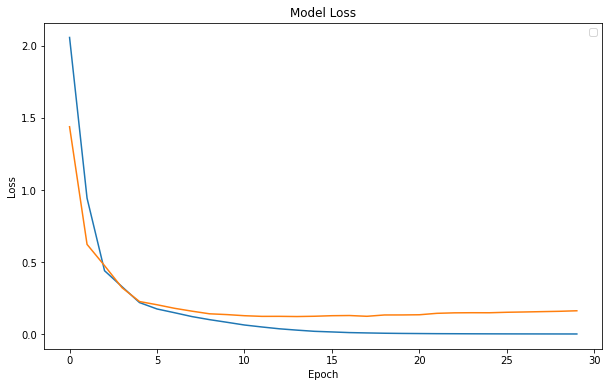

In [ ]:
model_1 = models.Sequential()
model_1.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model_1.add(layers.Dense(128, activation='relu'))
model_1.add(layers.Dense(64, activation='relu'))
model_1.add(layers.Dense(10, activation='softmax'))
#compiling
model_1.compile(optimizer='adam', 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])
#fitting
history = model_1.fit(X_train, y_train, epochs=30, batch_size=50, validation_data=(X_test, y_test))
evaluate_model(history,X_test,y_test,model_1)

## Model 2 : CONV1D

Epoch 1/30
8/8 [==============================] - 1s 44ms/step - loss: 1.1506 - accuracy: 0.5481 - val_loss: 1.4359 - val_accuracy: 0.9043
Epoch 2/30
8/8 [==============================] - 0s 13ms/step - loss: 0.3754 - accuracy: 0.9225 - val_loss: 1.3265 - val_accuracy: 0.9043
Epoch 3/30
8/8 [==============================] - 0s 13ms/step - loss: 0.2066 - accuracy: 0.9358 - val_loss: 1.2079 - val_accuracy: 0.9043
Epoch 4/30
8/8 [==============================] - 0s 13ms/step - loss: 0.1372 - accuracy: 0.9519 - val_loss: 1.0861 - val_accuracy: 0.9043
Epoch 5/30
8/8 [==============================] - 0s 14ms/step - loss: 0.0994 - accuracy: 0.9492 - val_loss: 0.9889 - val_accuracy: 0.9043
Epoch 6/30
8/8 [==============================] - 0s 14ms/step - loss: 0.0707 - accuracy: 0.9759 - val_loss: 0.8979 - val_accuracy: 0.9043
Epoch 7/30
8/8 [==============================] - 0s 12ms/step - loss: 0.0504 - accuracy: 0.9840 - val_loss: 0.8078 - val_accuracy: 0.9043
Epoch 8/30
8/8 [===========

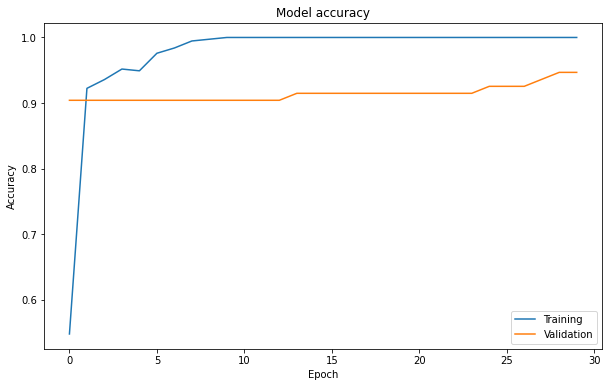

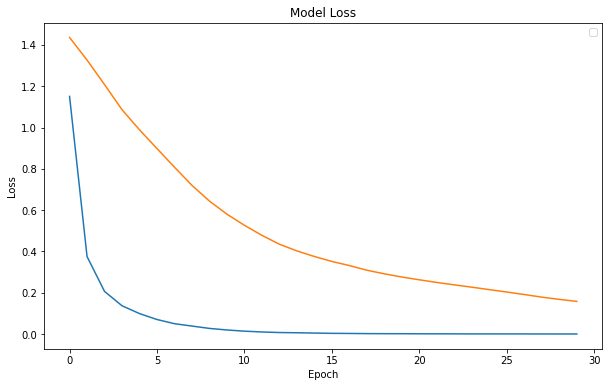

In [ ]:
im_shape=(X_train.shape[1],1)
inputs_cnn=Input(shape=(im_shape), name='inputs_cnn')
conv1_1=Convolution1D(64, (6), activation='relu', input_shape=im_shape)(inputs_cnn)
conv1_1=BatchNormalization()(conv1_1)
pool1=MaxPool1D(pool_size=(3), strides=(2), padding="same")(conv1_1)
conv2_1=Convolution1D(64, (3), activation='relu', input_shape=im_shape)(pool1)
conv2_1=BatchNormalization()(conv2_1)
pool2=MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv2_1)
conv3_1=Convolution1D(64, (3), activation='relu', input_shape=im_shape)(pool2)
conv3_1=BatchNormalization()(conv3_1)
pool3=MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv3_1)
flatten=Flatten()(pool3)
dense_end1 = Dense(64, activation='relu')(flatten)
dense_end2 = Dense(32, activation='relu')(dense_end1)
main_output = Dense(5, activation='softmax', name='main_output')(dense_end2)
model = Model(inputs= inputs_cnn, outputs=main_output)
#compiling 
model.compile(optimizer='adam', 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])
#fitting
history = model.fit(X_train, y_train, epochs=30, batch_size=50, validation_data=(X_test, y_test))
evaluate_model(history,X_test,y_test,model)